In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [45]:
df = pd.read_csv('../data/AR6-WG1-Data-Compilation/data/processed/fig-spm8/fig-spm8-timeseries.csv')
df

,model,reference_period_end_year,reference_period_start_year,region,scenario,unit,variable,1950,1951,1952,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Ch.4 Assessed,1900.0,1850.0,World,SSP2-4.5,K,Surface Air Temperature Change|5%,NaN,NaN,NaN,...,2.085346,2.093935,2.100788,2.107396,2.114528,2.121174,2.126581,2.132023,2.138236,2.144144
1,Ch.4 Assessed,1900.0,1850.0,World,SSP2-4.5,K,Surface Air Temperature Change|95%,NaN,NaN,NaN,...,3.415727,3.435020,3.453626,3.471900,3.487838,3.504371,3.520522,3.536066,3.550991,3.565741
2,Ch.4 Assessed,1900.0,1850.0,World,SSP2-4.5,K,Surface Air Temperature Change|Mean,NaN,NaN,NaN,...,2.650092,2.664827,2.675315,2.686950,2.698346,2.709810,2.721367,2.730281,2.739834,2.748134
3,Ch.4 Assessed,1900.0,1850.0,World,historical,K,Surface Air Temperature Change|5%,-0.060030,-0.055686,-0.042891,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ch.4 Assessed,1900.0,1850.0,World,historical,K,Surface Air Temperature Change|95%,0.608546,0.525308,0.540725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Ch.4 Assessed,1900.0,1850.0,World,historical,K,Surface Air Temperature Change|Mean,0.252242,0.274715,0.274303,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Ch.4 Assessed,1900.0,1850.0,World,SSP3-7.0,K,Surface Air Temperature Change|5%,NaN,NaN,NaN,...,2.820434,2.847465,2.876382,2.904347,2.932247,2.959685,2.986875,3.014037,3.040392,3.066457
7,Ch.4 Assessed,1900.0,1850.0,World,SSP3-7.0,K,Surface Air Temperature Change|95%,NaN,NaN,NaN,...,4.541136,4.595606,4.649577,4.704165,4.758398,4.812138,4.867173,4.922075,4.975588,5.027863
8,Ch.4 Assessed,1900.0,1850.0,World,SSP3-7.0,K,Surface Air Temperature Change|Mean,NaN,NaN,NaN,...,3.567629,3.606358,3.645376,3.684244,3.721229,3.758452,3.796472,3.835124,3.872383,3.908723
9,Ch.4 Assessed,1900.0,1850.0,World,SSP1-2.6,K,Surface Air Temperature Change|5%,NaN,NaN,NaN,...,1.360257,1.356951,1.352560,1.348302,1.342933,1.338565,1.333901,1.328776,1.324557,1.319652


In [82]:
nsidc = pd.read_excel('../data/nsidc/Sea_Ice_Index_Monthly_Data_by_Year_G02135_v3.0.xlsx',sheet_name='NH-Area')
nsidc.set_index('Unnamed: 0',inplace=True)
# nsidc

In [87]:
years = np.arange(1950,2100)

historical = np.array(df.iloc[32,7:]).astype(np.float32)

int_95 = np.array(df.iloc[31,7:]).astype(np.float32)
int_05 = np.array(df.iloc[30,7:]).astype(np.float32)


ssp1_19 = np.array(df.iloc[35,7:]).astype(np.float32)
ssp1_26 = np.array(df.iloc[26,7:]).astype(np.float32)
ssp2_45 = np.array(df.iloc[20,7:]).astype(np.float32)
ssp3_70 = np.array(df.iloc[23,7:]).astype(np.float32)
ssp5_85 = np.array(df.iloc[29,7:]).astype(np.float32)

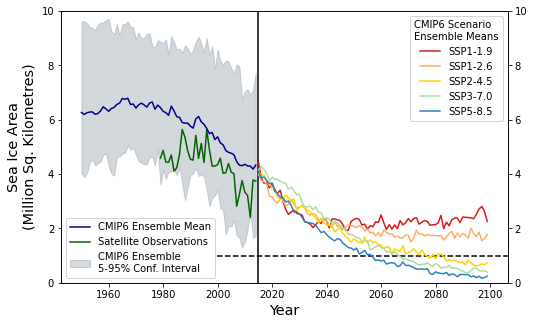

In [123]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

ax.plot(years,historical,zorder=5,color='darkblue',label='CMIP6 Ensemble Mean')

ax.plot(nsidc.index[nsidc.index < 2015],
        nsidc['September'][nsidc.index < 2015],
        color='darkgreen',label='Satellite Observations')

# ax.plot(nsidc.index,
#         nsidc['September'],
#         color='darkgreen',label='Satellite Observations')

ax.fill_between(years,int_95,int_05,color='slategrey',alpha=0.3,label='CMIP6 Ensemble\n5-95% Conf. Interval')


ax2 = ax.twinx()
ax.set_ylim(0,10)
ax2.set_ylim(0,10)

ssps = [ssp1_19,ssp1_26,ssp2_45,ssp3_70,ssp5_85]
colors = ['#d7191c','#fdae61','gold','#abdda4','#2b83ba']
labels = ['SSP1-1.9','SSP1-2.6','SSP2-4.5','SSP3-7.0','SSP5-8.5']

for series,color,label in zip(ssps,colors,labels):
    ax2.plot(years,series,zorder=5,
             color=color,
             label=label)


# ax.set_xticks(np.arange(1950,2021,10))

ax.set_ylabel('Sea Ice Area\n(Million Sq. Kilometres)',fontsize='x-large')
ax.set_xlabel('Year',fontsize='x-large')

ax.legend(loc='lower left')

ax2.legend(loc='upper right',title='CMIP6 Scenario\nEnsemble Means')

ax.axvline(2015,color='k')
ax.axhline(1,color='k',ls='--',xmin=0.35,xmax=2100,zorder=10)


fig_num = 10
for data_dir in['/home/robbie/Dropbox/book_chapter/figs',
                 '/home/robbie/Dropbox/Apps/Overleaf/Book_chapter/figs']:
    
    plt.savefig(f'{data_dir}/fig{fig_num}.jpg',dpi=500, bbox_inches='tight')


In [80]:
linregress(nsidc.index[nsidc.index < 2015][1:], nsidc['September'][nsidc.index < 2015][1:])

LinregressResult(slope=-0.046088545688545694, intercept=96.33444813384816, rvalue=-0.6672359347876776, pvalue=8.811074878781716e-06, stderr=0.008823499386347416, intercept_stderr=17.61635499120807)

In [81]:
linregress(years[(years>1978)&(years<2015)],historical[(years>1978)&(years<2015)])

LinregressResult(slope=-0.06896328054646575, intercept=143.08711565166828, rvalue=-0.9674060967101444, pvalue=7.34670345499564e-22, stderr=0.0030958850475789313, intercept_stderr=6.181018167747641)